In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'C:\Users\98all\Documents\GitHub\ECE196_SP21\Hate-2001-2019-0.csv')

In [5]:
#Fill empty values with None for Weapon Type and clean up typos in dataset
df['WeaponType'].fillna('None',inplace = True)
df['WeaponType'].replace('Other ( bottle, rocks, spitting)', 'Other (bottle, rocks, spitting)', inplace=True)
df['WeaponType'].replace('Firearm (unknown whether handgun, rifle or shotgun', 'Firearm (unknown whether handgun, rifle or shotgun)', inplace=True)

#Replace rest of NaN values with 'Unknown'
df_new = df.replace(np.nan, 'Unknown', regex=True)

#rearrange columns to be more easily readable
columns_titles = ['MostSeriousBias','MostSeriousBiasType','TotalNumberOfVictims','MostSeriousVictimType','TotalNumberOfSuspects','SuspectsRaceAsAGroup','MostSeriousUcr','MostSeriousUcrType','WeaponType','Offensive_Act','MostSeriousLocation','County','NCIC','ClosedYear','MonthOccurrence']
df_new=df_new.reindex(columns=columns_titles)

#One hot encode all necessary columns
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousBias'], prefix='Bias')],axis=1)
df_new.drop(['MostSeriousBias'],axis=1, inplace=True)
TotalNumberOfVictims = df_new['TotalNumberOfVictims']
df_new.drop(['TotalNumberOfVictims'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfVictims],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousVictimType'], prefix='VictimType')],axis=1)
df_new.drop(['MostSeriousVictimType'],axis=1, inplace=True)
TotalNumberOfSuspects = df_new['TotalNumberOfSuspects']
df_new.drop(['TotalNumberOfSuspects'],axis=1, inplace=True)
df_new = pd.concat([df_new,TotalNumberOfSuspects],axis=1)
df_new = pd.concat([df_new,pd.get_dummies(df_new['SuspectsRaceAsAGroup'], prefix='SuspectsRace')],axis=1)
df_new.drop(['SuspectsRaceAsAGroup'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcr'], prefix='Ucr')],axis=1)
df_new.drop(['MostSeriousUcr'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousUcrType'], prefix='UcrType')],axis=1)
df_new.drop(['MostSeriousUcrType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['WeaponType'], prefix='Weapon')],axis=1)
df_new.drop(['WeaponType'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['Offensive_Act'], prefix='Offense')],axis=1)
df_new.drop(['Offensive_Act'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MostSeriousLocation'], prefix='Location')],axis=1)
df_new.drop(['MostSeriousLocation'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['County'], prefix='County')],axis=1)
df_new.drop(['County'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['NCIC'], prefix='Agency')],axis=1)
df_new.drop(['NCIC'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['ClosedYear'], prefix='Year')],axis=1)
df_new.drop(['ClosedYear'],axis=1, inplace=True)
df_new = pd.concat([df_new,pd.get_dummies(df_new['MonthOccurrence'], prefix='Month')],axis=1)
df_new.drop(['MonthOccurrence'],axis=1, inplace=True)

In [6]:
#separate data into labels and data points
y_labels = df_new['MostSeriousBiasType']
x_data = df_new.iloc[:, 1:778]

In [9]:
#split data into training and testing sets and shuffle before splitting
x_Train, x_Test, y_Train, y_Test = train_test_split(x_data, y_labels, shuffle = True, test_size = .2)

In [10]:
#scale the data/normalize the data so that the features do not broadly vary
scaler = StandardScaler()
scaler.fit(x_Train)

x_Train = scaler.transform(x_Train)
x_Test = scaler.transform(x_Test)

In [11]:
#build the Knn classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_Train, y_Train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
y_pred = classifier.predict(x_Test)

In [13]:
#print out statistics to show how well our classifier did
from sklearn.metrics import classification_report
print(classification_report(y_Test, y_pred))

                         precision    recall  f1-score   support

             Disability       0.94      0.94      0.94        16
                 Gender       1.00      0.70      0.82        10
   Gender Nonconforming       0.95      0.81      0.87        67
Race/Ethnicity/Ancestry       0.73      0.95      0.83      2755
               Religion       0.77      0.50      0.61       781
     Sexual Orientation       0.85      0.37      0.52       993

               accuracy                           0.75      4622
              macro avg       0.87      0.71      0.76      4622
           weighted avg       0.77      0.75      0.72      4622



In [25]:
# applied Principal Component Analysis (PCA) in order to reduce  
# the number of components and dimensionality of the data set in order
# to be visualized easier

from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
transf = pca.fit_transform(x_Train)
transf2 = pca.fit_transform(x_Test)



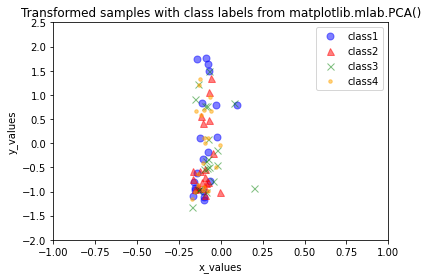

In [32]:
# initial utilization of PCA shows very little information
# this is most likely due to nonspecific features leading to poor 
# generalizations in the data

plt.plot(transf2[0:20,0],transf2[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transf2[20:40,0], transf2[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.plot(transf2[40:60,0], transf2[40:60,1], 'x', markersize=7, color='green', alpha=0.5, label='class3')
plt.plot(transf2[60:80,0], transf2[60:80,1], '.', markersize=7, color='orange', alpha=0.5, label='class4')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-1,1])
plt.ylim([-2,2.5])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()